In [4]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import matplotlib.pyplot as plt
from sklearn import tree

In [5]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

print(pima.head())

   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [6]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [7]:

# Create Decision Tree classifer object using information gain as the splitting criteria.
clf = DecisionTreeClassifier(criterion='entropy')

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)


In [8]:

#Predict the response for test dataset
#Lets print out the first few rows of the test data.
print("Testing:")
print(X_test.head())
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Testing:
     pregnant  insulin   bmi  age  glucose  bp  pedigree
285         7      135  26.0   51      136  74     0.647
101         1        0  26.1   22      151  60     0.179
581         6        0  25.0   27      109  60     0.206
352         3        0  34.4   46       61  82     0.243
726         1      180  36.1   25      116  78     0.496
Accuracy: 0.7532467532467533


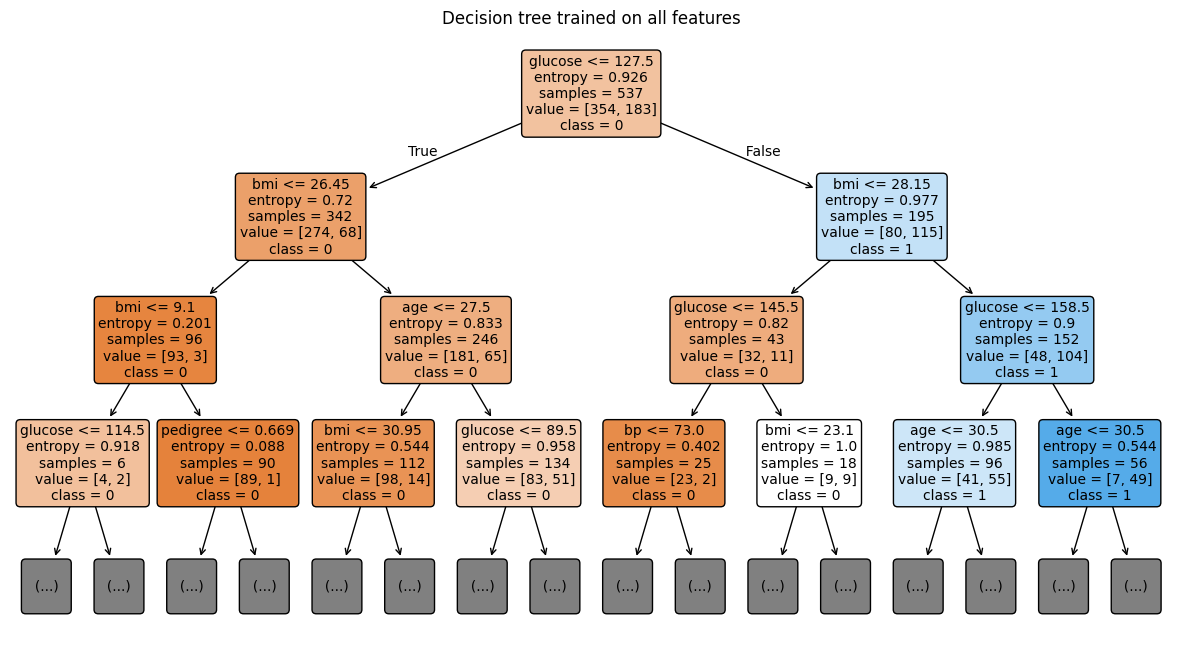

In [9]:
plt.figure(figsize=(15,8))
tree.plot_tree(clf, filled=True, rounded=True, max_depth=3, fontsize=10, feature_names=feature_cols,class_names=['0','1'])
plt.title("Decision tree trained on all features")
plt.show()

In [12]:
# Collect data from user, ensuring numerical input
pregnant = int(input("Pregnant: "))
glucose = float(input("Glucose: "))
bp = float(input("Blood Pressure: "))
insulin = float(input("Insulin: "))
bmi = float(input("BMI: "))
pedigree = float(input("Pedigree: "))
age = int(input("Age: "))

# Create input data with only the selected features
input_data = pd.DataFrame([[pregnant, insulin, bmi, age, glucose, bp, pedigree]], columns=feature_cols)

# Make the prediction and get probabilities
prediction_probabilities = clf.predict_proba(input_data)

# Get the final prediction
prediction = clf.predict(input_data)[0]
print(f"Prediction: {prediction} (0 = No Diabetes, 1 = Diabetes)")
print(f"Prediction Probabilities: {prediction_probabilities}")

Enter the following
Prediction: 0
